In [7]:
import os
from os.path import join as pjoin
from tqdm import tqdm
import numpy as np

In [8]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.axes3d as p3
def plot_3d_motion(save_path, kinematic_tree, joints, title, figsize=(10, 10), fps=120, radius=4):
#     matplotlib.use('Agg')

    title_sp = title.split(' ')
    if len(title_sp) > 10:
        title = '\n'.join([' '.join(title_sp[:10]), ' '.join(title_sp[10:])])
    def init():
        ax.set_xlim3d([-radius / 2, radius / 2])
        ax.set_ylim3d([0, radius])
        ax.set_zlim3d([0, radius])
        # print(title)
        fig.suptitle(title, fontsize=20)
        ax.grid(b=False)

    def plot_xzPlane(minx, maxx, miny, minz, maxz):
        ## Plot a plane XZ
        verts = [
            [minx, miny, minz],
            [minx, miny, maxz],
            [maxx, miny, maxz],
            [maxx, miny, minz]
        ]
        xz_plane = Poly3DCollection([verts])
        xz_plane.set_facecolor((0.5, 0.5, 0.5, 0.5))
        ax.add_collection3d(xz_plane)

    #         return ax

    # (seq_len, joints_num, 3)
    data = joints.copy().reshape(len(joints), -1, 3)
    fig = plt.figure(figsize=figsize)
    ax = p3.Axes3D(fig)
    init()
    MINS = data.min(axis=0).min(axis=0)
    MAXS = data.max(axis=0).max(axis=0)
    colors = ['red', 'blue', 'black', 'red', 'blue',  
              'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue',
             'darkred', 'darkred','darkred','darkred','darkred']
    frame_number = data.shape[0]
    #     print(data.shape)

    height_offset = MINS[1]
    data[:, :, 1] -= height_offset
    trajec = data[:, 0, [0, 2]]
    
    data[..., 0] -= data[:, 0:1, 0]
    data[..., 2] -= data[:, 0:1, 2]

    #     print(trajec.shape)

    def update(index):
        #         print(index)
        for coll in ax.lines:
            coll.remove()
        for coll in ax.collections:
            coll.remove()
        ax.view_init(elev=120, azim=-90)
        ax.dist = 7.5
        #         ax =
        plot_xzPlane(MINS[0]-trajec[index, 0], MAXS[0]-trajec[index, 0], 0, MINS[2]-trajec[index, 1], MAXS[2]-trajec[index, 1])
#         ax.scatter(data[index, :22, 0], data[index, :22, 1], data[index, :22, 2], color='black', s=3)
        
        if index > 1:
            ax.plot3D(trajec[:index, 0]-trajec[index, 0], np.zeros_like(trajec[:index, 0]), trajec[:index, 1]-trajec[index, 1], linewidth=1.0,
                      color='blue')
        #             ax = plot_xzPlane(ax, MINS[0], MAXS[0], 0, MINS[2], MAXS[2])
        
        
        for i, (chain, color) in enumerate(zip(kinematic_tree, colors)):
#             print(color)
            if i < 5:
                linewidth = 4.0
            else:
                linewidth = 2.0
            ax.plot3D(data[index, chain, 0], data[index, chain, 1], data[index, chain, 2], linewidth=linewidth, color=color)
        #         print(trajec[:index, 0].shape)

        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])

    ani = FuncAnimation(fig, update, frames=frame_number, interval=1000/fps, repeat=False)

    ani.save(save_path, fps=fps)
    plt.close()


In [9]:
src_dir = './MotionFix/new_joints/'
tgt_ani_dir = "./MotionFix/animations/"

In [10]:
kinematic_chain = [[0, 2, 5, 8, 11], [0, 1, 4, 7, 10], [0, 3, 6, 9, 12, 15], [9, 14, 17, 19, 21], [9, 13, 16, 18, 20]]
os.makedirs(tgt_ani_dir, exist_ok=True)

In [11]:
npy_files = os.listdir(src_dir)
npy_files = sorted(npy_files)
# npy_files = npy_files[:10]

This will take a few hours for the whole dataset. Here we show ten animations for an example


To accelerate the process, you could copy and run this script.

  0%|          | 6/6730 [00:15<4:53:00,  2.61s/it]


KeyboardInterrupt: 

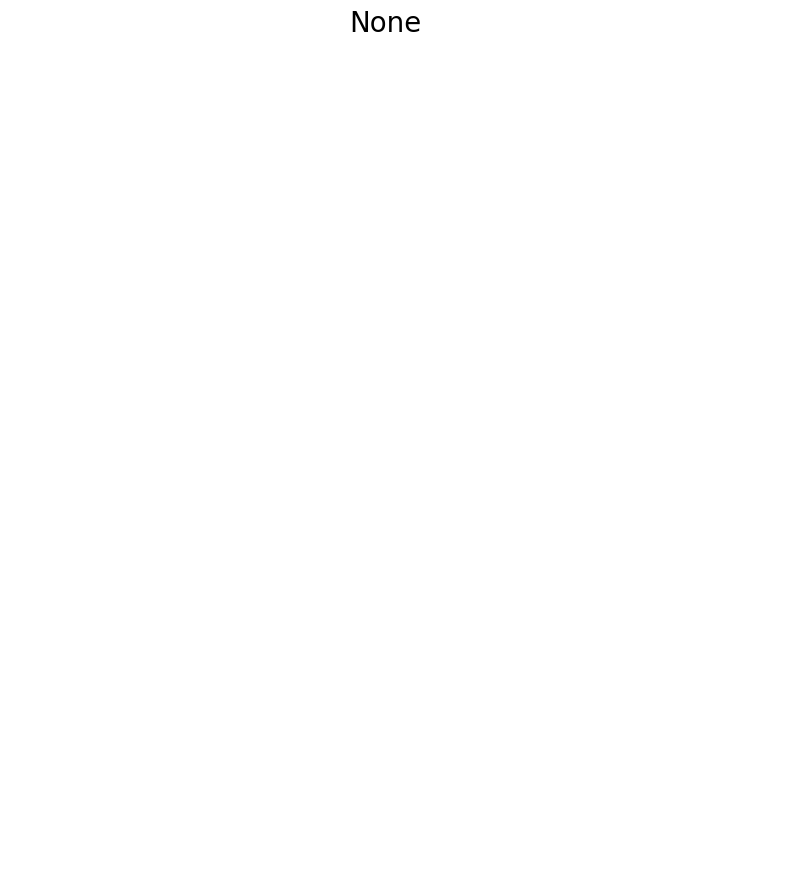

In [12]:
for npy_file in tqdm(npy_files):
    data = np.load(pjoin(src_dir, npy_file), allow_pickle=True).item()['source']
    save_path = pjoin(tgt_ani_dir, npy_file[:-3] + 'gif')
    if os.path.exists(save_path):
        continue
#   You may set the title on your own.
    plot_3d_motion(save_path, kinematic_chain, data, title="None", fps=20, radius=4)